In [148]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import requests
import time


from IPython.display import HTML, display
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from datetime import datetime

from sklearn.model_selection import KFold
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer
import json
import pickle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
#from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [149]:
def add_spacy_data(dataset, feature_column):
    '''
    Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) 
    tokens and pushes them into a new dataset. returns an 
    enriched dataset'''
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = spacy.load('en_core_web_md')
    ##
    for i in range (0, len(dataset)):
        print("Extracting verbs and topics from record {} of {}".format(i+1, len(dataset)), end = "\r")
        song = dataset.iloc[i][feature_column]
        doc = nlp(song)
        spacy_dataframe = pd.DataFrame()
        for token in doc:
            if token.lemma_ == "-PRON-":
                    lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
    dataset['Verbs'] = verbs
    dataset['Nouns'] = nouns
    dataset['Adverbs'] = adverbs
    dataset['Corpus'] = corpus
    return dataset

In [154]:
df = pd.read_csv('./Data/Lyrics_Artist_spacy.csv')
df.shape

(996, 8)

In [58]:
df.head(3)

song_link       song  \
0  /lyric/35984628/The+Beatles/Blackbird  Blackbird   
1  /lyric/36392416/The+Beatles/My+Bonnie  My Bonnie   
2  /lyric/36255422/The+Beatles/Let+It+Be  Let It Be   

                                              lyrics  artist_name  \
0  Blackbird singing in the dead of night\nTake t...  The-Beatles   
1  My Bonnie lies over the ocean\nMy Bonnie lies ...  The-Beatles   
2  When I find myself in times of trouble, Mother...  The-Beatles   

                                               Verbs  \
0  singe take break learn fly wait arise take sin...   
1  lie lie lie bring lie lie lie bring bring brin...   
2  find come speak let stand speak let let let le...   

                                               Nouns  \
0  blackbird dead night wing life moment bird sin...   
1    ocean sea ocean ocean sea ocean ocean sea ocean   
2  time trouble word wisdom hour darkness front w...   

                                             Adverbs  \
0                           only only only only only   
1  back back back back back back back back back b...   
2                   when right when still when still   

                                              Corpus  
0  blackbird singe dead night break wing learn fl...  
1  Bonnie lie ocean Bonnie lie sea Bonnie lie oce...  
2  find time trouble Mother Mary come speak word ...

In [155]:
df_reduced = df.drop_duplicates(subset=['Nouns'])
df_reduced.shape

(918, 8)

In [156]:
df_reduced = df_reduced.drop_duplicates(subset=['Verbs'])
df_reduced.shape

(888, 8)

In [157]:
df_reduced = df_reduced.drop_duplicates(subset=['Adverbs' ])
df_reduced.shape

(837, 8)

## Make wordclouds

There are 144188 words in the combination of all review.


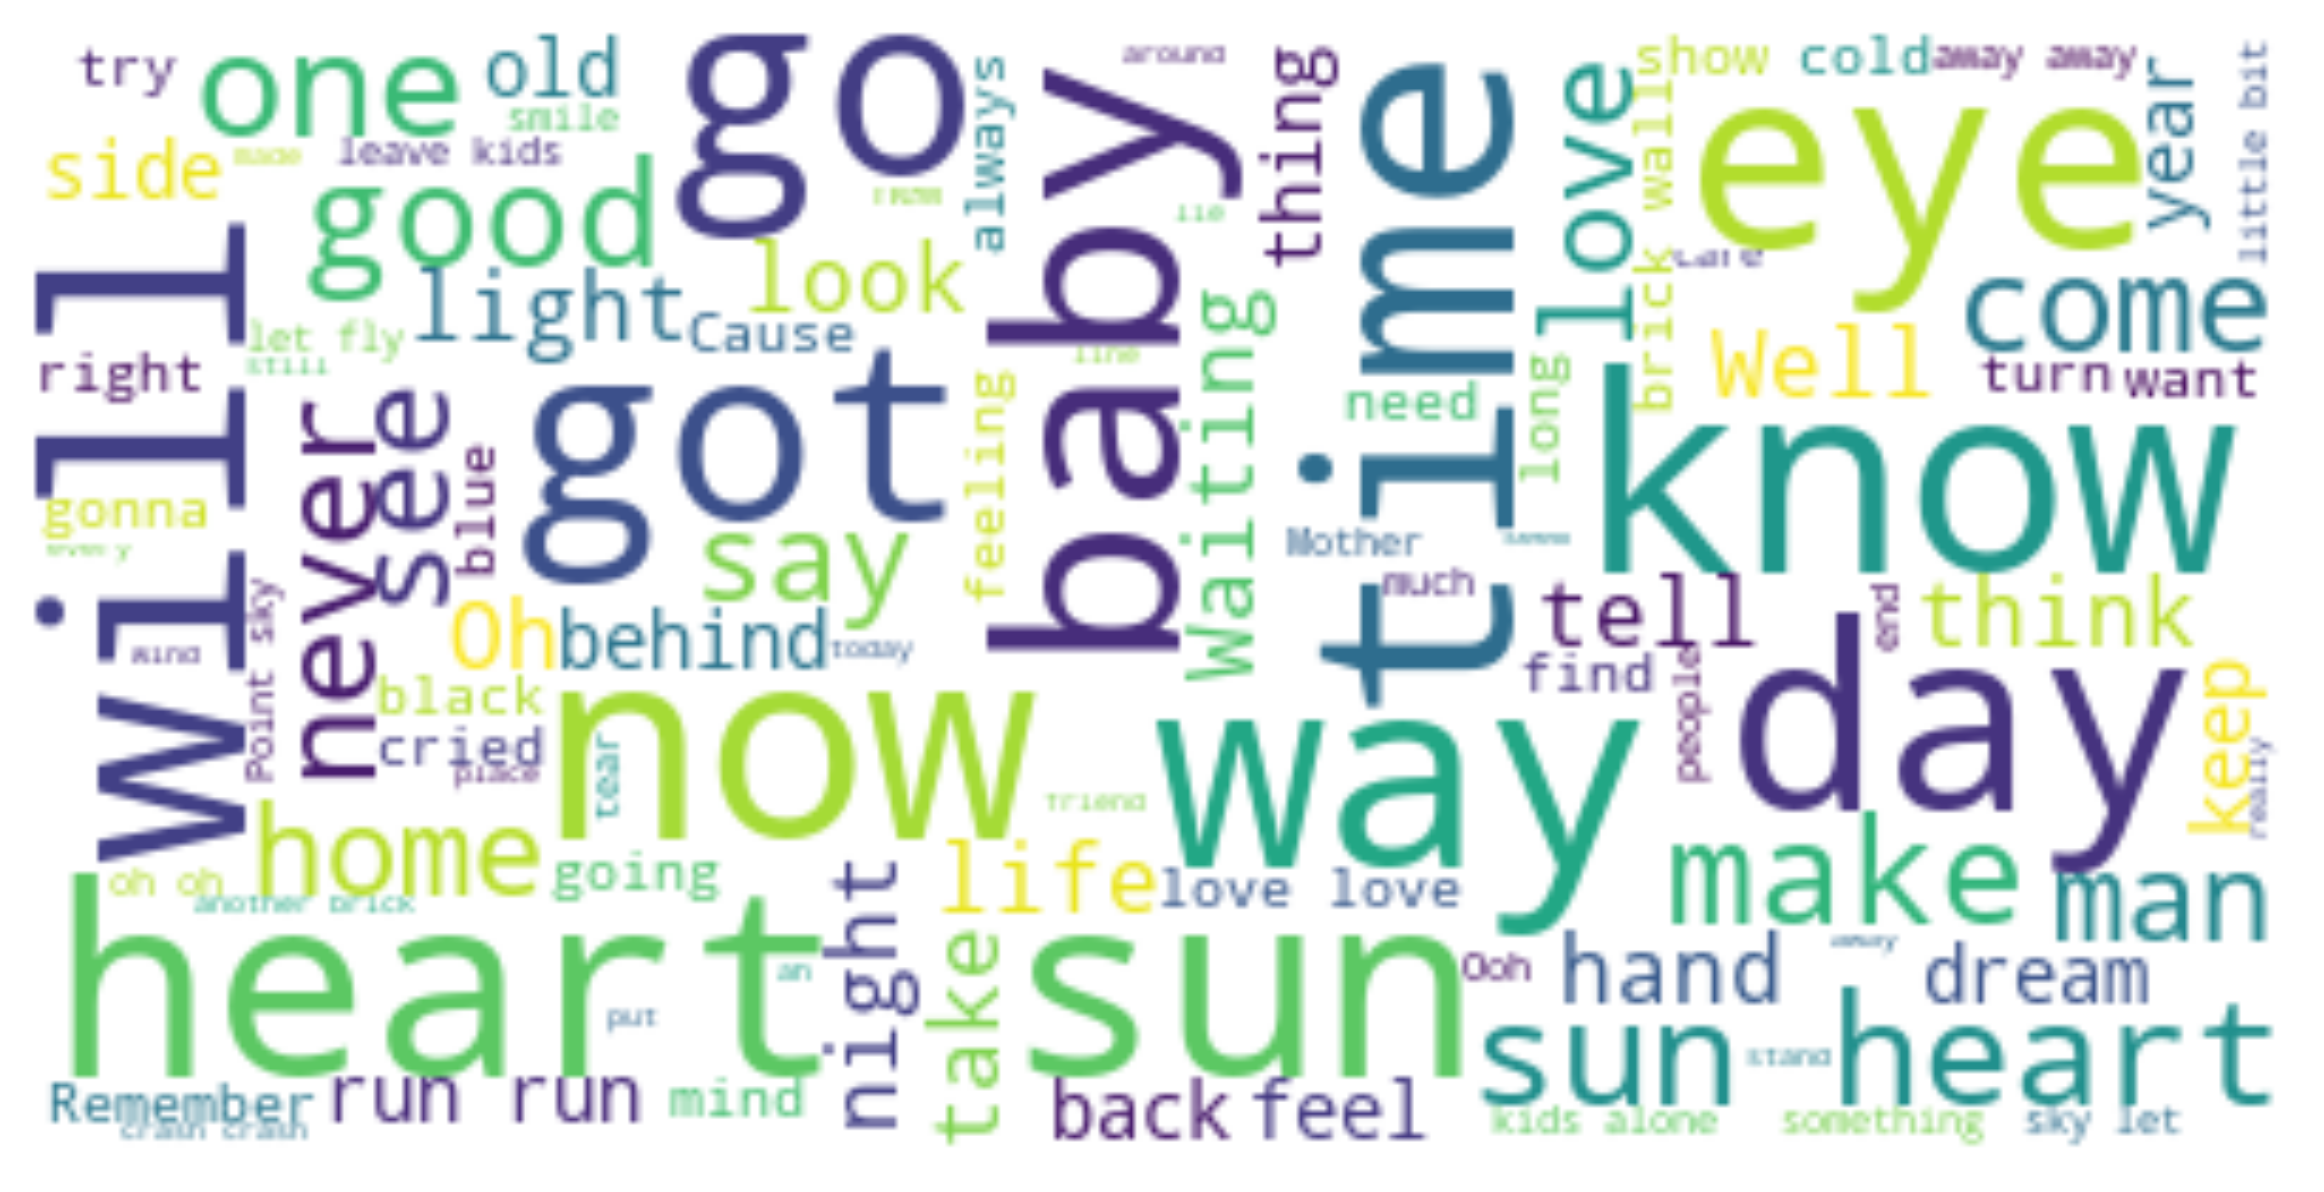

In [159]:
## Wordcloud for Floyd
df_Floyd = pd.read_csv('./Data/Lyrics_Floyd.csv')

text_Floyd = " ".join(review for review in df_Floyd.lyrics)
print ("There are {} words in the combination of all review.".format(len(text_Floyd)))


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white" ).generate(text_Floyd)


# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,5])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file('Wordcloud_Floyd.png')

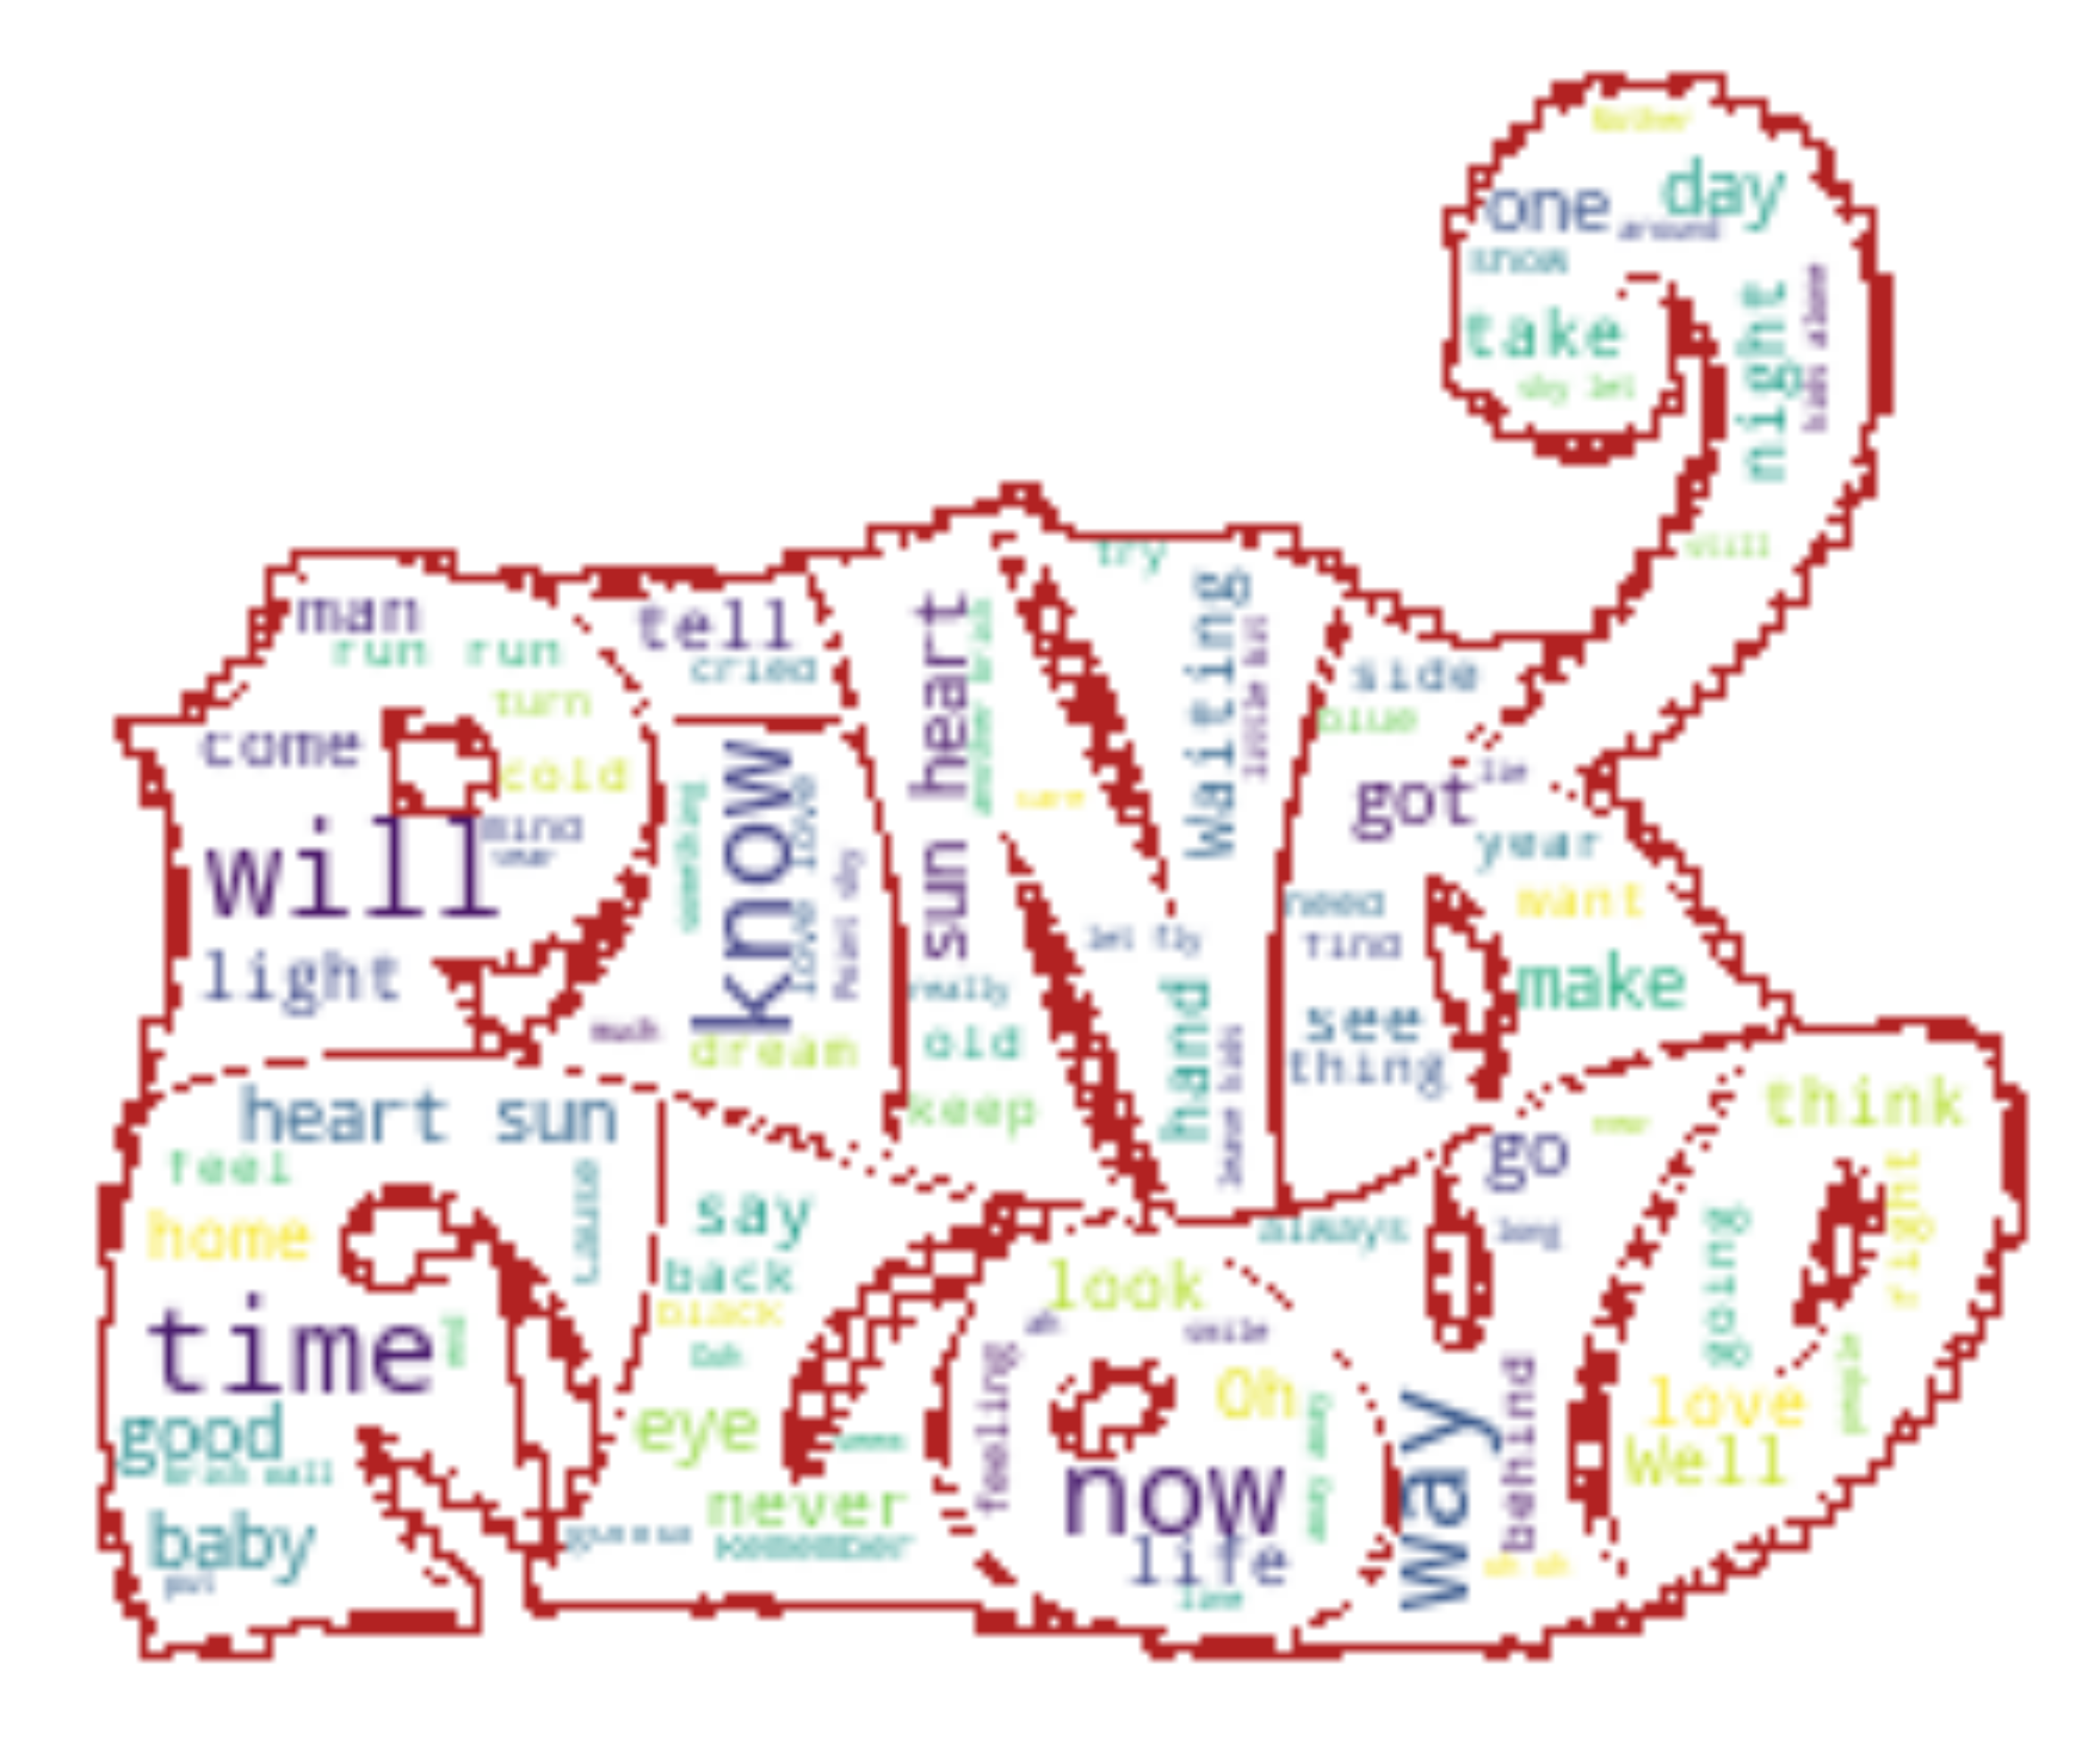

In [160]:
## Masking in wordcloud

Floyd_mask = np.array(Image.open("Pink_Floyd.png"))

# use the transform_format() function to swap number 0 to 255.

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
# Transform your mask into a new one that will work with the function:
transformed_Floyd_mask = np.ndarray((Floyd_mask.shape[0], Floyd_mask.shape[1]), np.int32)

for i in range(len(Floyd_mask)):
    transformed_Floyd_mask[i] = list(map(transform_format, Floyd_mask[i]))
    
# Create a word cloud image
wc_Floyd = WordCloud(background_color="white", max_words=1000, mask=transformed_Floyd_mask,
                contour_width=1, contour_color='firebrick')


    
# Generate a wordcloud
wc_Floyd.generate(text_Floyd)


# show
plt.figure(figsize=[30,10])
plt.imshow(wc_Floyd, interpolation='bilinear')
plt.axis("off")
plt.show()

#Saving the image
wc_Floyd.to_file('Wordcloud_Floyd1.png')



There are 382748 words in the combination of all review.


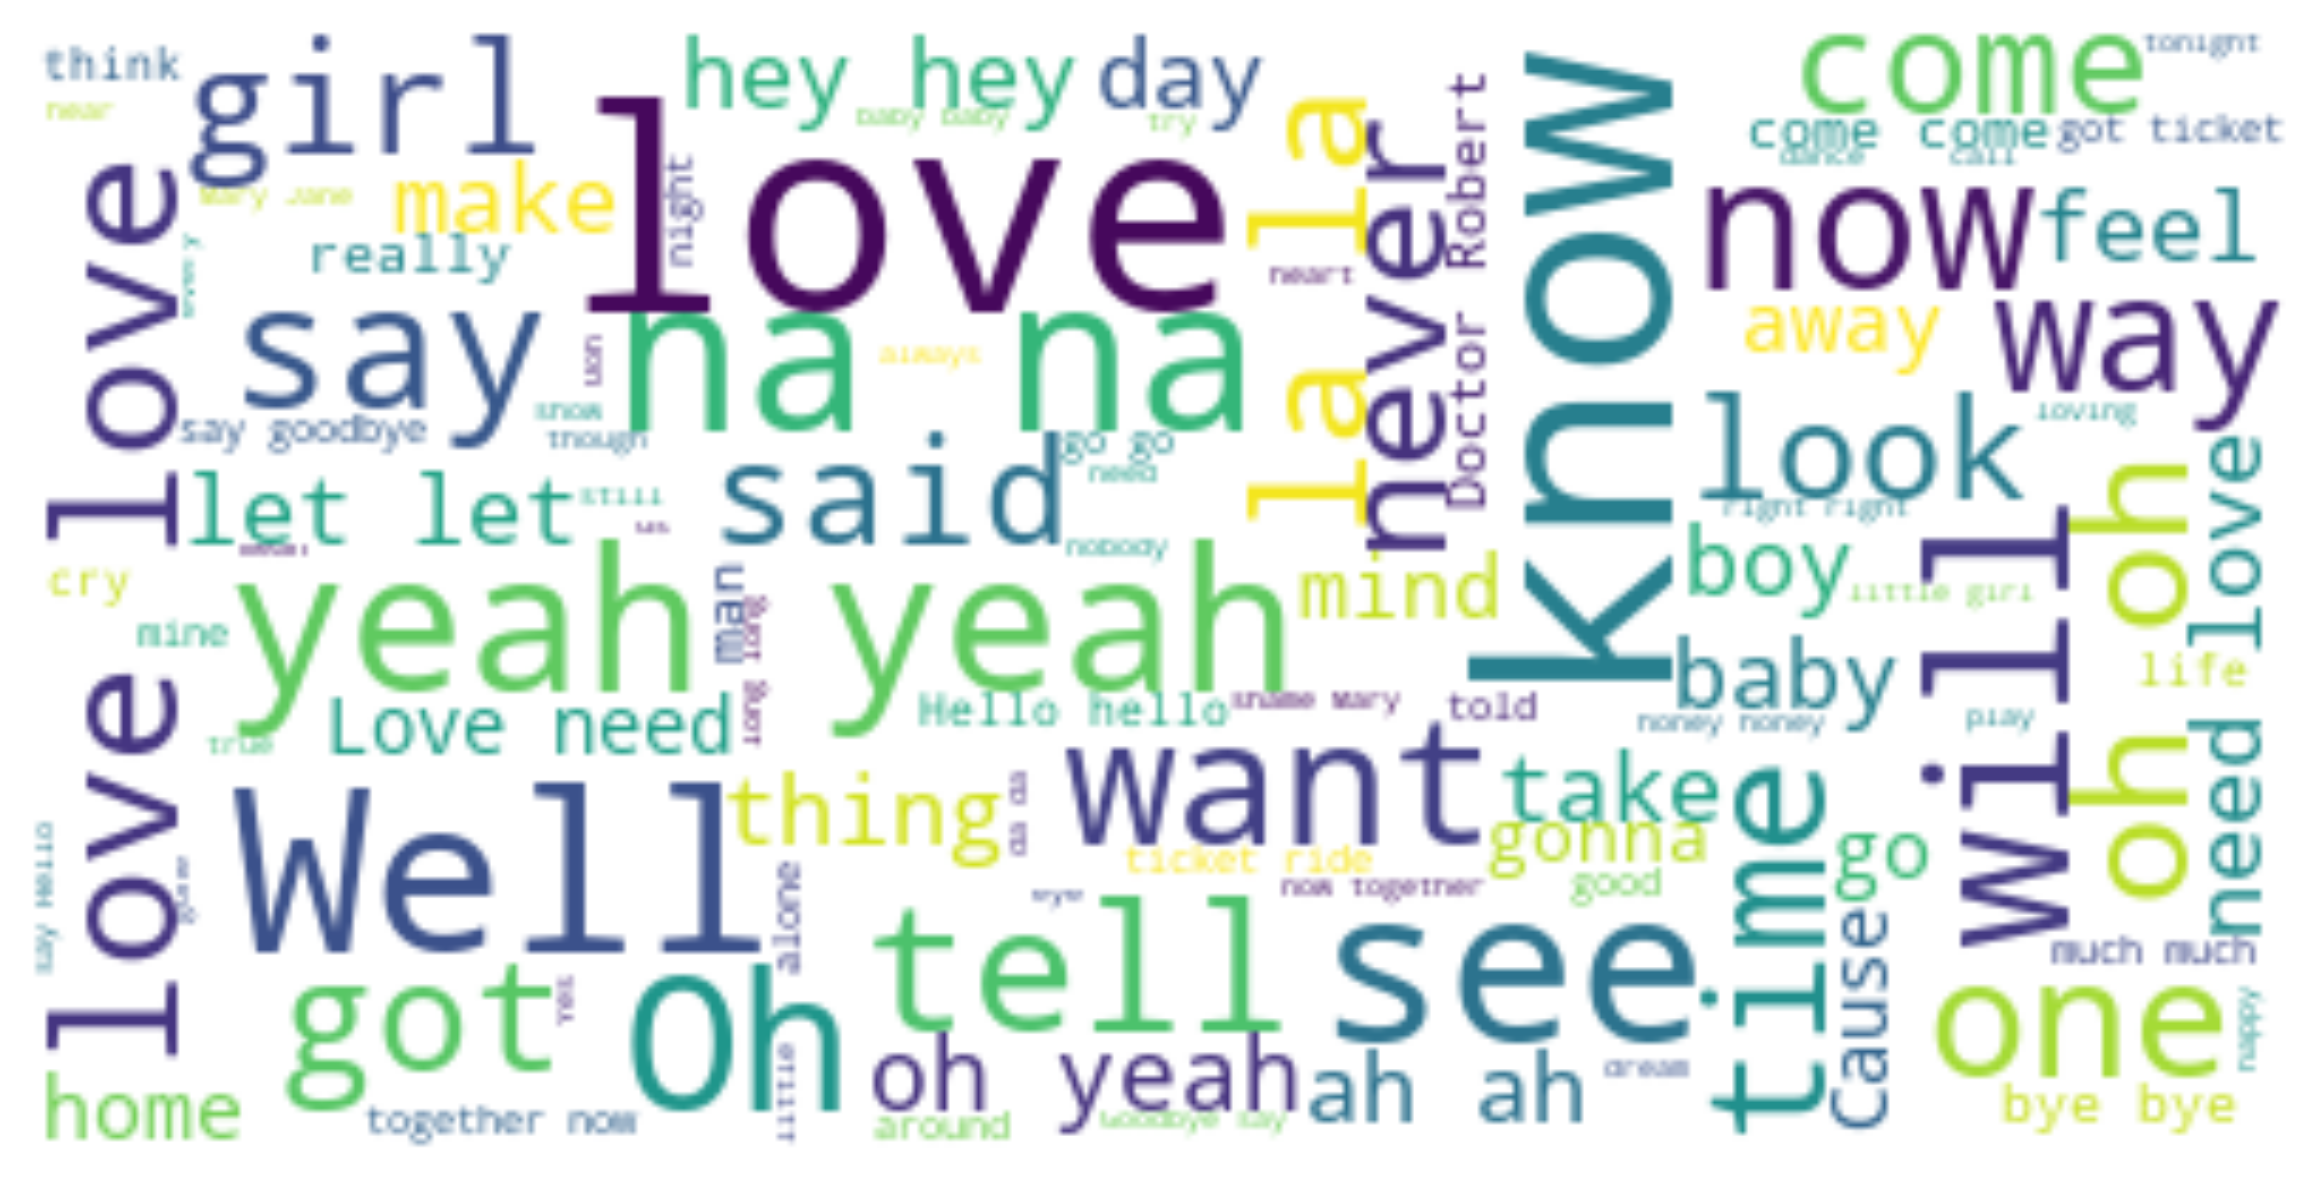

In [162]:
## Wordcloud for Beatles
df_Beatles = pd.read_csv('./Data/Lyrics_Beatles.csv')


text_Beatles = " ".join(review for review in df_Beatles.lyrics)
print ("There are {} words in the combination of all review.".format(len(text_Beatles)))


wordcloud_Beatles = WordCloud(max_font_size=50, max_words=100, background_color="white" ).generate(text_Beatles)


# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,5])

plt.imshow(wordcloud_Beatles, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving the image
wordcloud_Beatles.to_file('Worldcloud_Beatles.png')

There are 334177 words in the combination of all review.


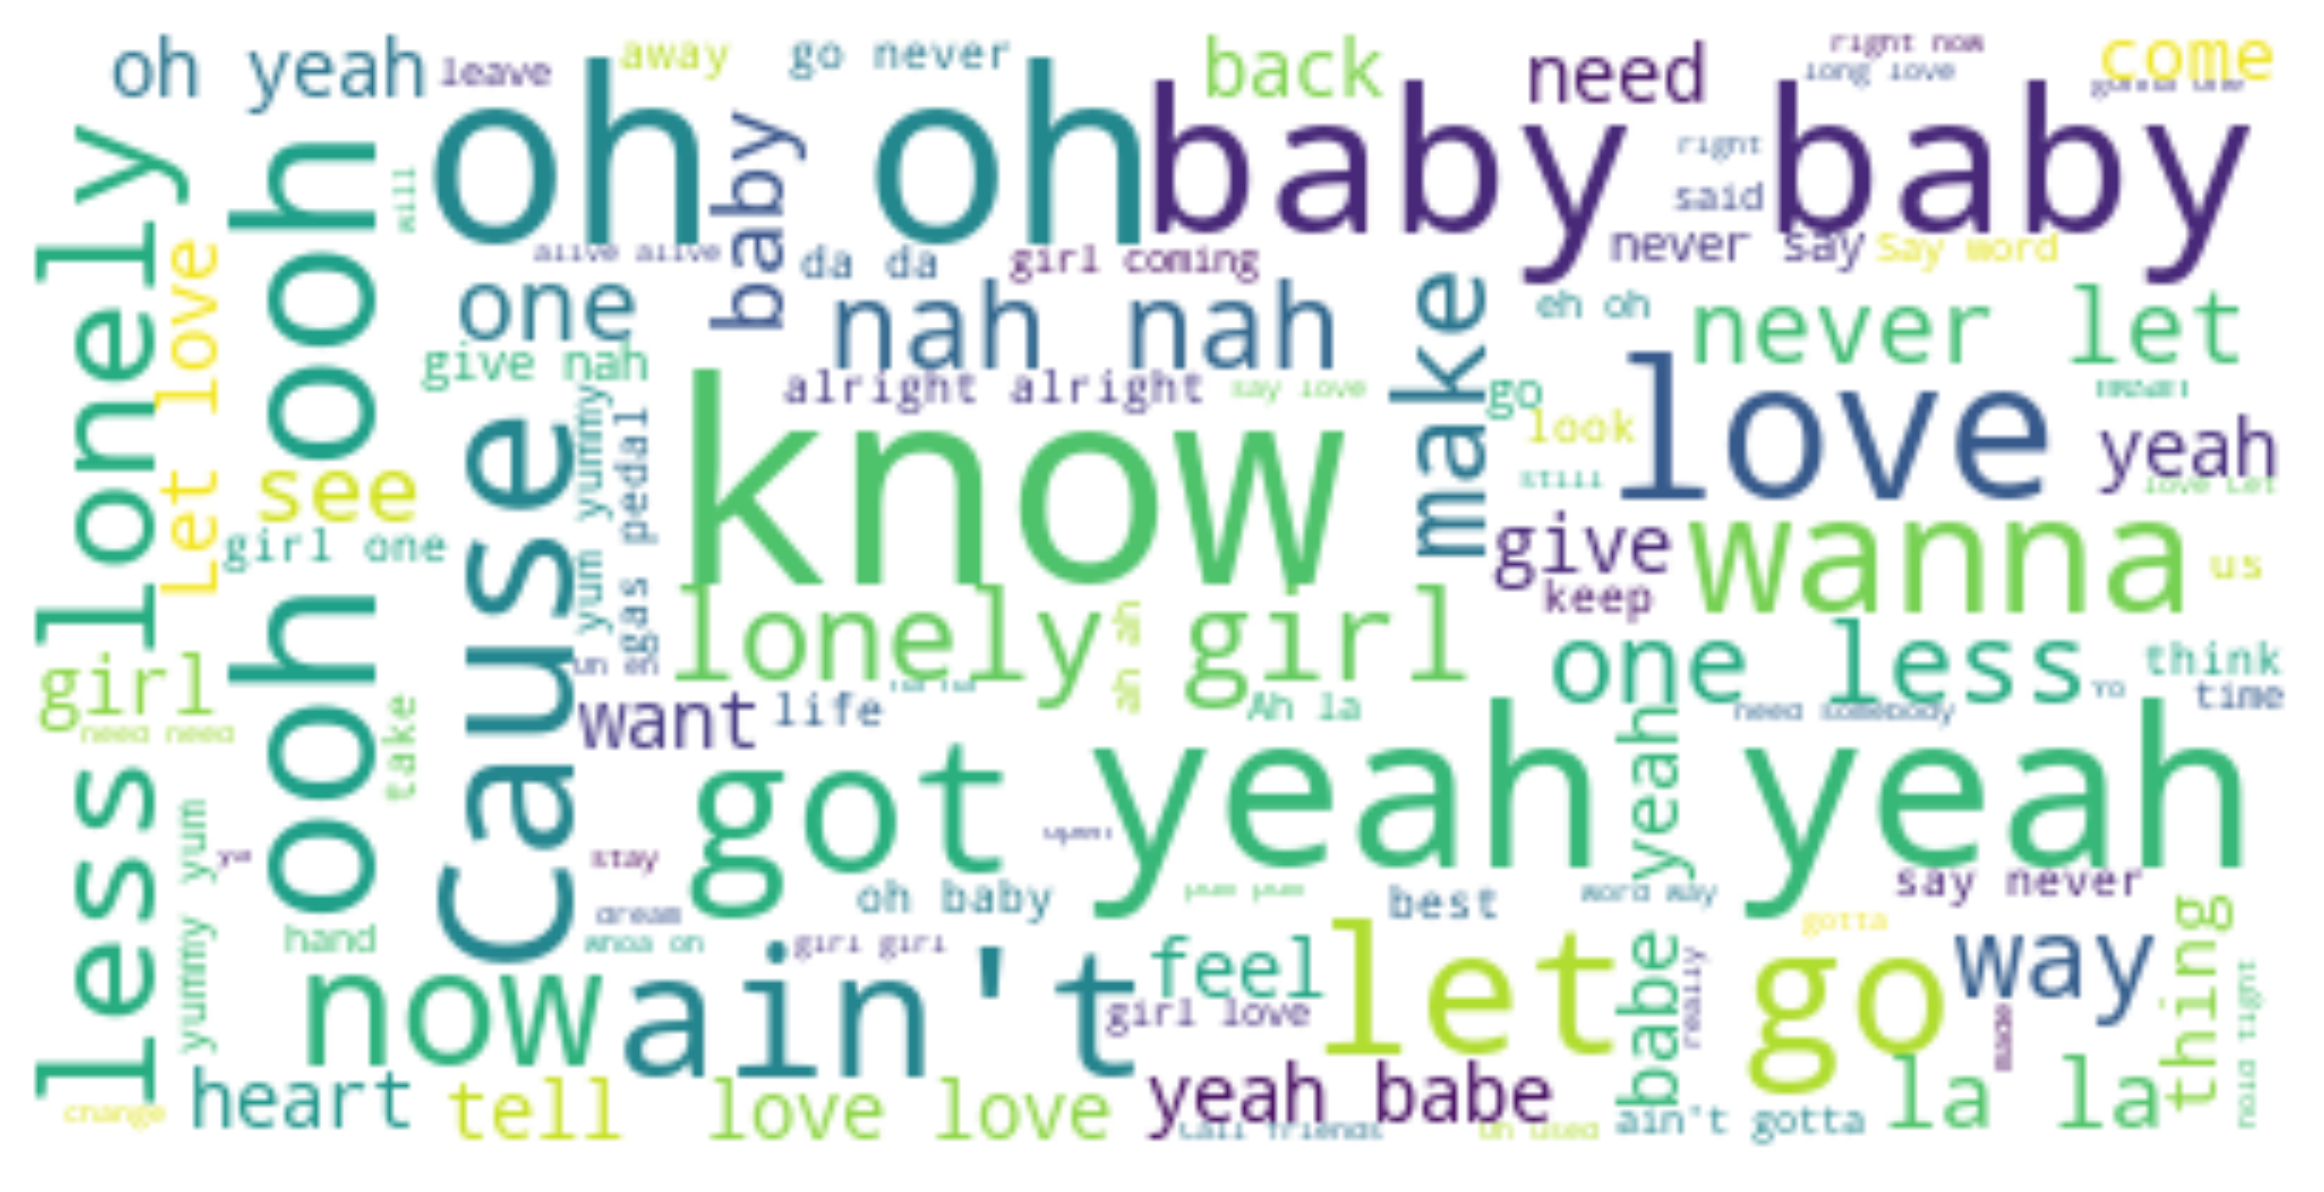

In [163]:
## Wordcloud for Bieber
df_Bieber = pd.read_csv('./Data/Lyrics_Bieber.csv')


text_Bieber = " ".join(review for review in df_Bieber.lyrics)
print ("There are {} words in the combination of all review.".format(len(text_Bieber)))


wordcloud_Bieber = WordCloud(max_font_size=50, max_words=100, background_color="white" ).generate(text_Bieber)


# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,5])

plt.imshow(wordcloud_Bieber, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving the image
wordcloud_Bieber.to_file('Worldcloud_Bieber.png')

There are 327985 words in the combination of all review.


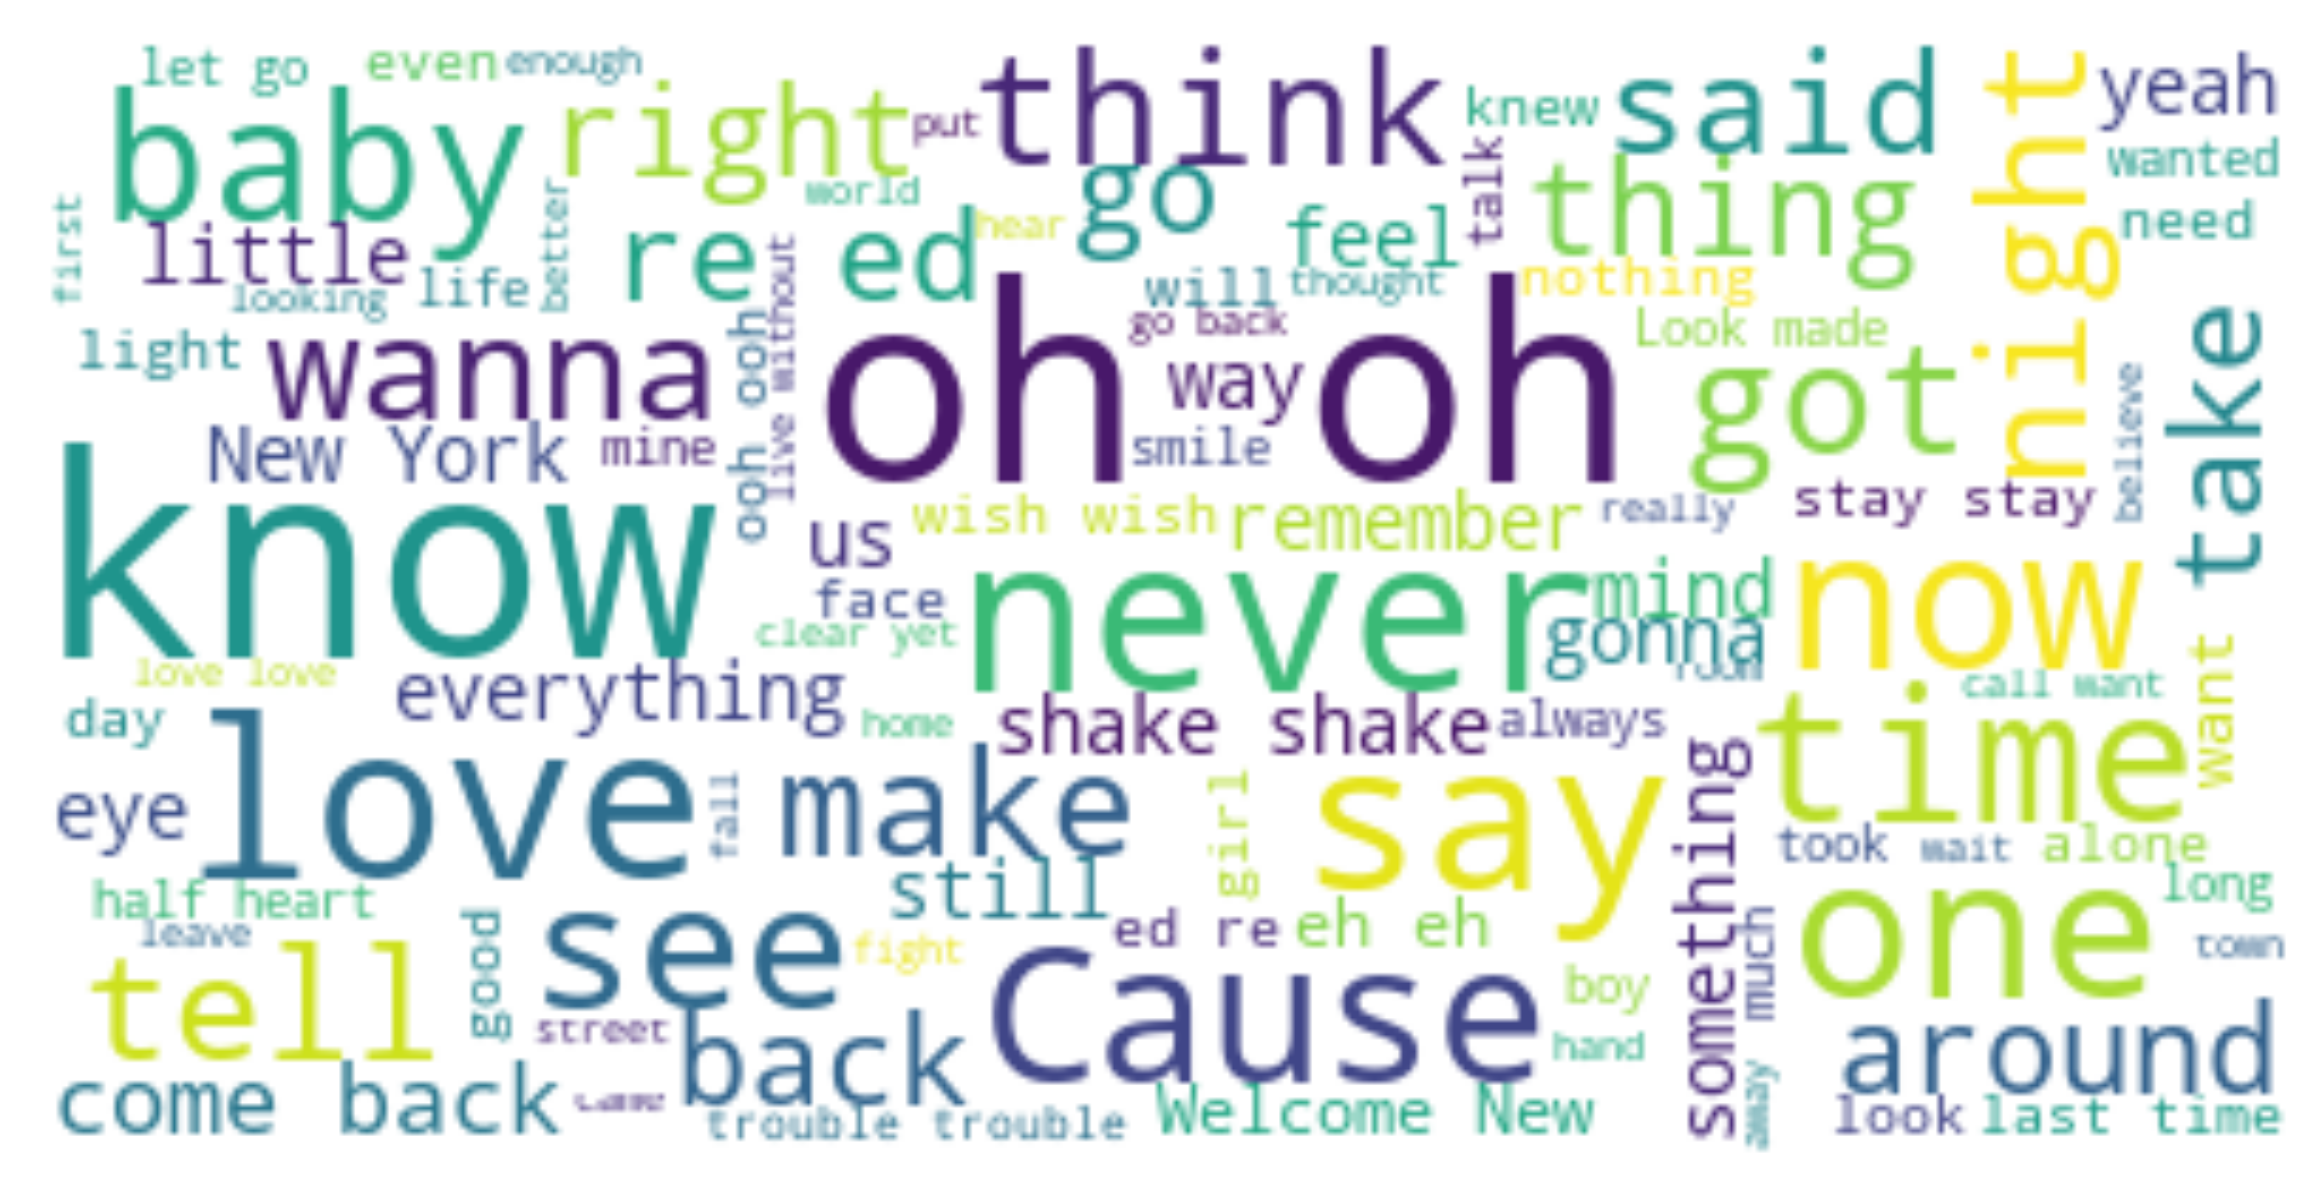

In [164]:
## Wordcloud for Swift
df_Swift = pd.read_csv('./Data/Lyrics_Swift.csv')


text_Swift = " ".join(review for review in df_Swift.lyrics)
print ("There are {} words in the combination of all review.".format(len(text_Swift)))


wordcloud_Swift = WordCloud(max_font_size=50, max_words=100, background_color="white" ).generate(text_Swift)


# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,5])

plt.imshow(wordcloud_Swift, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving the image
wordcloud_Swift.to_file('Worldcloud_Swift.png')

## Load X and Y

In [73]:
X = df_reduced[['lyrics','Verbs', 'Nouns', 'Adverbs','Corpus']].reset_index()
y = df_reduced['artist_name']
(X.shape, y.shape)

((837, 6), (837,))

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [75]:
# Using TfidfVectorizer will calculate a value that takes the amount the term appears in the
# document and also across all documents
preprocessing = make_column_transformer(
                (TfidfVectorizer(), 'lyrics'))

## Using Random Forest 


In [76]:
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling as os

#smt = SMOTE(random_state=42)
model_pipe = make_pipeline(
             preprocessing,
            SMOTE(random_state=42),
            RandomForestClassifier(class_weight= 'balanced', random_state=42)
)
model_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('tfidfvectorizer', TfidfVectorizer(),
                                    'lyrics')])),
  ('smote', SMOTE(random_state=42)),
  ('randomforestclassifier',
   RandomForestClassifier(class_weight='balanced', random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('tfidfvectorizer', TfidfVectorizer(),
                                  'lyrics')]),
 'smote': SMOTE(random_state=42),
 'randomforestclassifier': RandomForestClassifier(class_weight='balanced', random_state=42),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('tfidfvectorizer',
   TfidfVectorizer(),
   'lyrics')],
 'columntransformer__verbose': False,
 'columntransformer__tfidfvectorizer': TfidfVectorizer(),
 'columntransformer__tfidfvectorizer__anal

In [89]:
# a couple of different tweaks to see the results
grid_rf = {'columntransformer__tfidfvectorizer__lowercase': [True, False],
        'columntransformer__tfidfvectorizer__ngram_range': [(1, 1), (1,2), (1,3)],
        'randomforestclassifier__max_depth': [10, 20, 30, 40, 50]
       }

cv_rf = GridSearchCV(
                    estimator=model_pipe,
                    param_grid=grid_rf,
                    scoring='accuracy',
                    cv=3, return_train_score=True )

In [90]:
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('tfidfvectorizer',
                                                                         TfidfVectorizer(),
                                                                         'lyrics')])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'columntransformer__tfidfvectorizer__lowercase': [True,
                                                                           False],
                         'columntransformer__tfidfvectorizer__ngram_range': [(1,
                                                                              1),
          

In [91]:
cv_rf_results = pd.DataFrame(cv_rf.cv_results_).sort_values('rank_test_score')
cv_rf_results['difference_between_scores']=cv_rf_results['mean_train_score']-cv_rf_results['mean_test_score']
cv_rf_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.247168      0.003528         0.032899        0.000684   
1        0.304325      0.002927         0.034999        0.001216   
18       0.410355      0.002419         0.042437        0.000407   
19       0.421727      0.009574         0.045444        0.001665   
3        0.341014      0.014142         0.036244        0.000861   
4        0.346940      0.007677         0.036943        0.000600   
2        0.321798      0.006263         0.034288        0.000181   
20       0.475237      0.006392         0.080438        0.000517   
16       0.420928      0.016548         0.046015        0.000600   
17       0.420980      0.002434         0.043751        0.001103   
5        0.406998      0.026265         0.065197        0.001264   
15       0.293271      0.011073         0.041415        0.000848   
6        0.534349      0.012251         0.068443        0.001472   
23       0.709553      0.002908         0.080410        0.000997   
25       0.693393      0.009525         0.116487        0.001534   
24       0.713910      0.006599         0.079671        0.001307   
7        0.647504      0.039763         0.073047        0.003819   
21       0.614409      0.005572         0.080096        0.001800   
22       0.693723      0.012836         0.080132        0.001552   
8        0.651548      0.010310         0.073362        0.001371   
10       0.632591      0.023445         0.105316        0.004888   
26       0.904565      0.004195         0.115646        0.001538   
9        0.688224      0.072798         0.072862        0.001054   
11       0.763126      0.004550         0.102403        0.000737   
12       0.924607      0.063597         0.107836        0.004012   
27       1.012281      0.012059         0.113951        0.001361   
13       0.939915      0.010267         0.107147        0.000658   
14       0.984859      0.050968         0.108992        0.008974   
28       1.083153      0.003966         0.115369        0.000720   
29       1.101150      0.012146         0.114575        0.001762   

   param_columntransformer__tfidfvectorizer__lowercase  \
0                                                True    
1                                                True    
18                                              False    
19                                              False    
3                                                True    
4                                                True    
2                                                True    
20                                              False    
16                                              False    
17                                              False    
5                                                True    
15                                              False    
6                                                True    
23                                              False    
25                                              False    
24                                              False    
7                                                True    
21                                              False    
22                                              False    
8                                                True    
10                                               True    
26                                              False    
9                                                True    
11                                               True    
12                                               True    
27                                              False    
13                                               True    
14                                               True    
28                                              False    
29                                              False    

   param_columntransformer__tfidfvectorizer__ngram_range  \
0                                   

In [92]:
y_pred = cv_rf.best_estimator_.predict(X_test)

In [93]:
cv_rf.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('tfidfvectorizer',
                                                  TfidfVectorizer(),
                                                  'lyrics')])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

In [94]:
accuracy_score(y_pred, y_test)

0.7047619047619048

In [123]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_classifier_evaluation(y_true, y_pred, model):
    print(f'Results for your model {model}:')
    print(f'  Accuracy: {round(accuracy_score(y_true,y_pred),3)}')
    print(f'  Precision: {round(precision_score(y_true, y_pred, average = "macro"),3)}')
    print(f'  Recall: {round(recall_score(y_true, y_pred, average = "macro"),3)}')
    print(f'  F1: {round(f1_score(y_true, y_pred, average = "macro"),3)}')
    cm = confusion_matrix(y_true, y_pred)
    #print(cm)
    sns.heatmap(cm, annot= True, fmt = 'd', xticklabels = ['The_Beatles','Pink-Flyod', 'Justin_Bieber', 'Taylor Swift'], yticklabels= ['The_Beatles','Pink-Flyod', 'Justin_Bieber', 'Taylor Swift'])

Results for your model rf:
  Accuracy: 0.705
  Precision: 0.648
  Recall: 0.757
  F1: 0.677


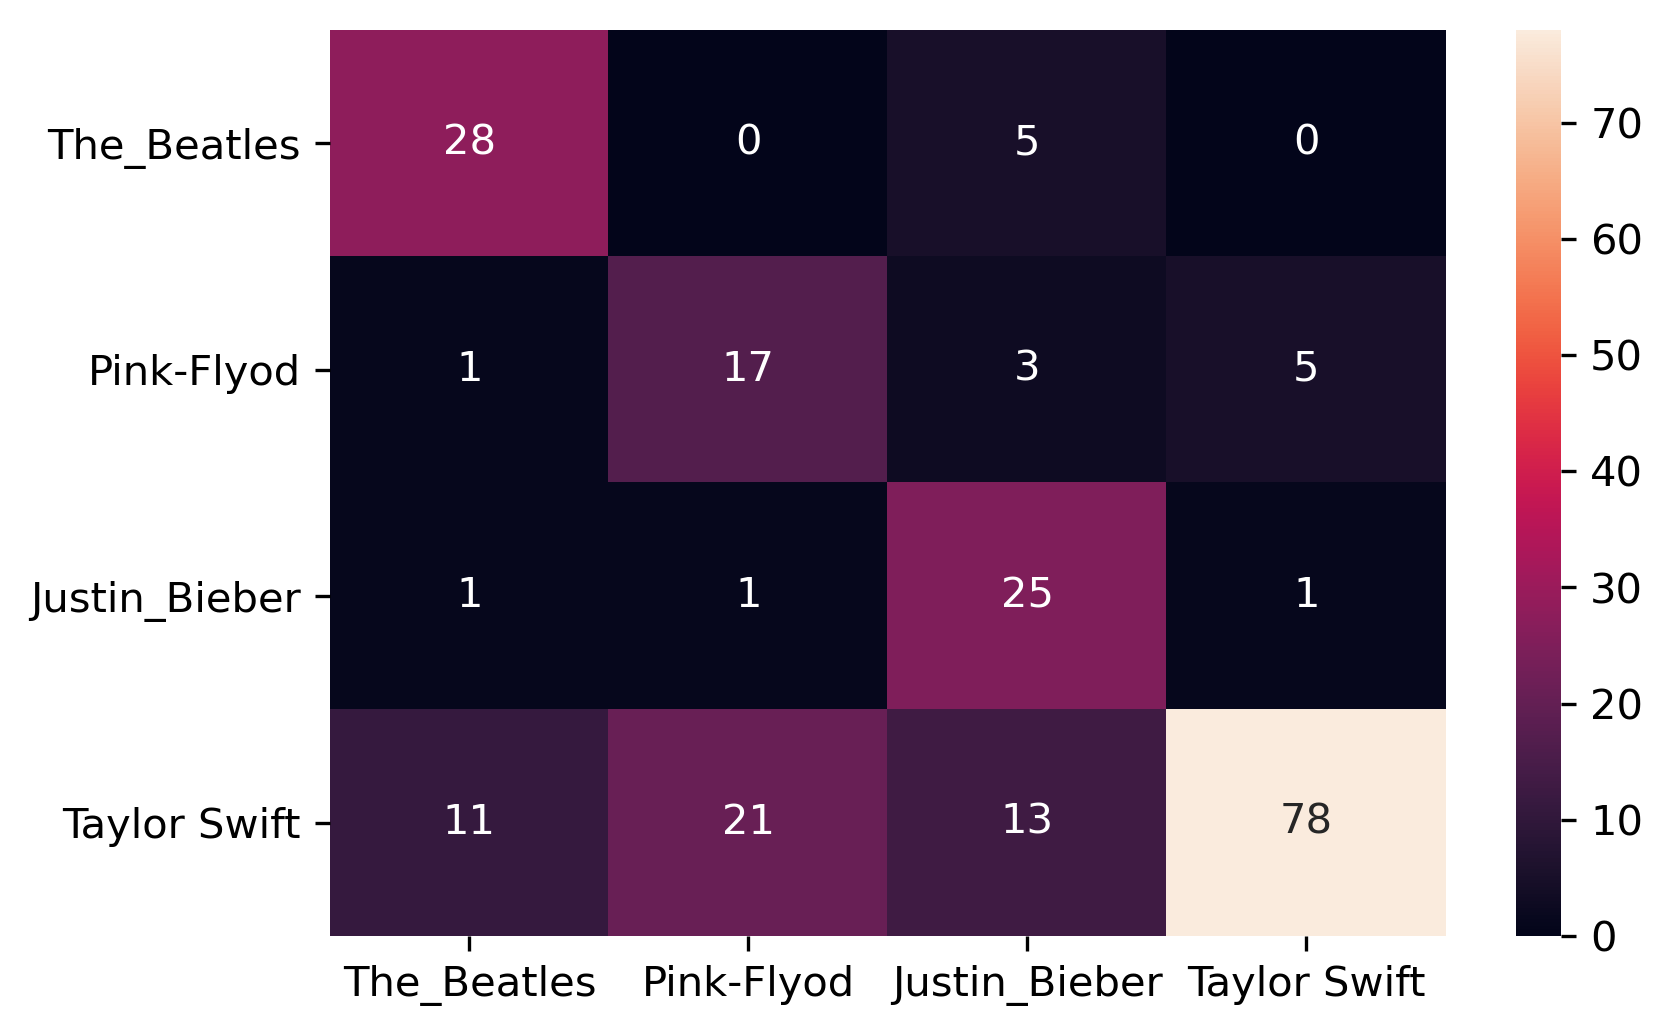

In [124]:
print_classifier_evaluation(y_pred, y_test, 'rf')

## Naive Bayes model


In [125]:
from sklearn.naive_bayes import MultinomialNB
# combining the preprocessing and the model in one pipeline
model_pipe_NB = make_pipeline(
            preprocessing,
            SMOTE(random_state=42),
            MultinomialNB())
model_pipe_NB.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('tfidfvectorizer', TfidfVectorizer(),
                                    'lyrics')])),
  ('smote', SMOTE(random_state=42)),
  ('multinomialnb', MultinomialNB())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('tfidfvectorizer', TfidfVectorizer(),
                                  'lyrics')]),
 'smote': SMOTE(random_state=42),
 'multinomialnb': MultinomialNB(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('tfidfvectorizer',
   TfidfVectorizer(),
   'lyrics')],
 'columntransformer__verbose': False,
 'columntransformer__tfidfvectorizer': TfidfVectorizer(),
 'columntransformer__tfidfvectorizer__analyzer': 'word',
 'columntransformer__tfidfvectorizer__binary': False,
 'columntransformer__tfidfvectorizer__decode_error

In [126]:
# a couple of different tweaks to see the results
grid_NB = {'columntransformer__tfidfvectorizer__lowercase': [True, False],
        'columntransformer__tfidfvectorizer__ngram_range': [(1, 1), (1,2)],
           'multinomialnb__alpha' : [.5, 1, 1.5, 2, 3]
        
       }

cv_NB = GridSearchCV(
                    estimator=model_pipe_NB,
                    param_grid=grid_NB,
                    scoring='accuracy',
                    cv=3, return_train_score=True )

In [127]:
cv_NB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('tfidfvectorizer',
                                                                         TfidfVectorizer(),
                                                                         'lyrics')])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'columntransformer__tfidfvectorizer__lowercase': [True,
                                                                           False],
                         'columntransformer__tfidfvectorizer__ngram_range': [(1,
                                                                              1),
                                                                             (1,
                                                                              2)],
       

In [128]:
cv_NB_results = pd.DataFrame(cv_NB.cv_results_).sort_values('rank_test_score')
cv_NB_results['difference_between_scores']=cv_NB_results['mean_train_score']-cv_NB_results['mean_test_score']
cv_NB_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.063448      0.001146         0.023136        0.000640   
10       0.067970      0.000844         0.025374        0.000269   
5        0.167872      0.015699         0.050431        0.003780   
15       0.174565      0.003011         0.050746        0.002160   
1        0.060324      0.000593         0.022784        0.000309   
6        0.169944      0.006396         0.048790        0.001115   
11       0.066985      0.001914         0.024206        0.001138   
16       0.177932      0.002852         0.052698        0.001057   
2        0.061304      0.000979         0.023656        0.000359   
7        0.167271      0.006739         0.051861        0.002855   
12       0.065420      0.001003         0.024493        0.000386   
17       0.175813      0.003200         0.050269        0.002181   
3        0.063680      0.000377         0.023513        0.000370   
8        0.169498      0.006104         0.050125        0.001059   
18       0.184543      0.002902         0.051538        0.001306   
13       0.066744      0.001251         0.023456        0.000974   
9        0.163506      0.002119         0.051208        0.000200   
19       0.180130      0.010310         0.050958        0.001038   
14       0.065851      0.001219         0.024702        0.000304   
4        0.062013      0.000966         0.022835        0.000758   

   param_columntransformer__tfidfvectorizer__lowercase  \
0                                                True    
10                                              False    
5                                                True    
15                                              False    
1                                                True    
6                                                True    
11                                              False    
16                                              False    
2                                                True    
7                                                True    
12                                              False    
17                                              False    
3                                                True    
8                                                True    
18                                              False    
13                                              False    
9                                                True    
19                                              False    
14                                              False    
4                                                True    

   param_columntransformer__tfidfvectorizer__ngram_range  \
0                                              (1, 1)      
10                                             (1, 1)      
5                                              (1, 2)      
15                                             (1, 2)      
1                                              (1, 1)      
6                                              (1, 2)      
11                                             (1, 1)      
16                                             (1, 2)      
2                                              (1, 1)      
7                                              (1, 2)      
12                                             (1, 1)      
17                                             (1, 2)      
3                                              (1, 1)      
8                                              (1, 2)      
18                                             (1, 2)      
13                                             (1, 1)      
9                                              (1, 2)      
19                                             (1, 2)      
14                                             (1, 1)      
4                                              (1, 1)      

   param_multinomialnb__alpha  \
0                         0.5   
10                        0.5

In [129]:
y_pred_NB = cv_NB.best_estimator_.predict(X_test)

In [130]:
accuracy_score(y_pred_NB, y_test)

0.6047619047619047

In [131]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_classifier_evaluation(y_true, y_pred, model):
    print(f'Results for your model {model}:')
    print(f'  Accuracy: {round(accuracy_score(y_true,y_pred),3)}')
    print(f'  Precision: {round(precision_score(y_true, y_pred, average = "macro"),3)}')
    print(f'  Recall: {round(recall_score(y_true, y_pred, average = "macro"),3)}')
    print(f'  F1: {round(f1_score(y_true, y_pred, average = "macro"),3)}')
    cm = confusion_matrix(y_true, y_pred)
    #print(cm)
    sns.heatmap(cm, annot= True, fmt = 'd', xticklabels = ['The_Beatles','Pink-Flyod', 'Justin_Bieber', 'Taylor Swift'], yticklabels= ['The_Beatles','Pink-Flyod', 'Justin_Bieber', 'Taylor Swift'])

Results for your model NB:
  Accuracy: 0.605
  Precision: 0.648
  Recall: 0.661
  F1: 0.613


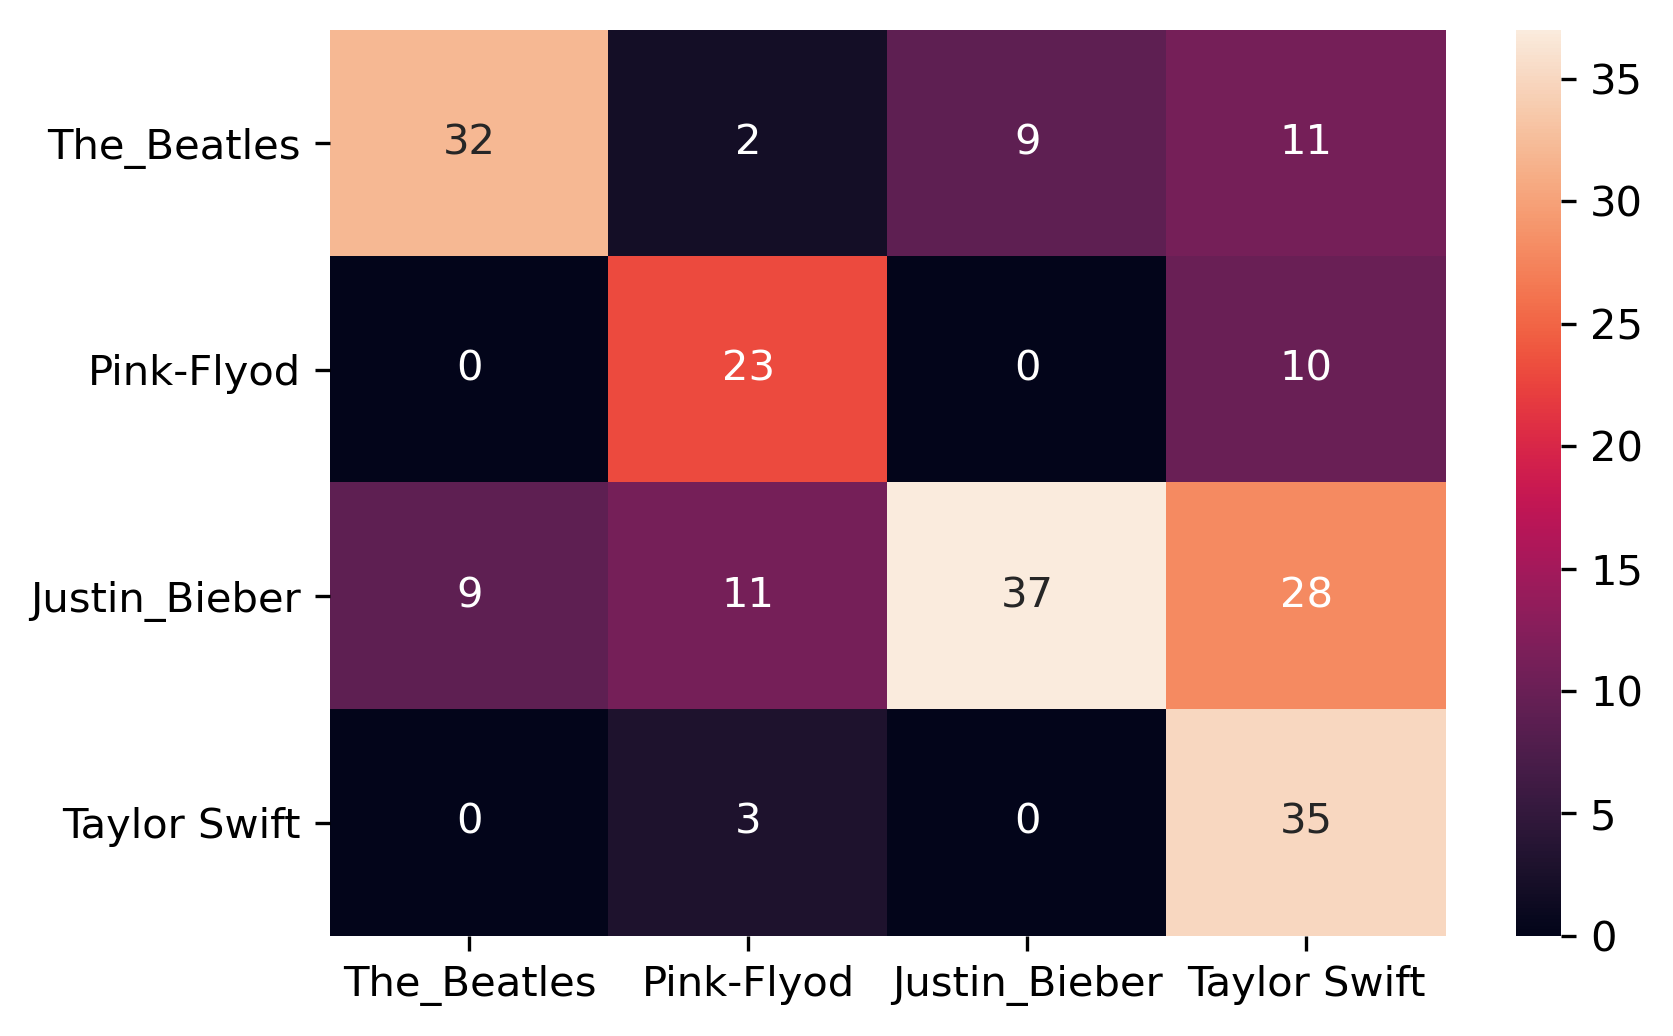

In [132]:
print_classifier_evaluation(y_pred_NB, y_test, 'NB')

## Logistic regression


In [133]:
from sklearn.linear_model import LogisticRegression

# combining the preprocessing and the model in one pipeline
model_pipe_LR = make_pipeline(
            preprocessing,
            SMOTE(random_state=42),
            LogisticRegression(random_state=42))
model_pipe_LR.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('tfidfvectorizer', TfidfVectorizer(),
                                    'lyrics')])),
  ('smote', SMOTE(random_state=42)),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('tfidfvectorizer', TfidfVectorizer(),
                                  'lyrics')]),
 'smote': SMOTE(random_state=42),
 'logisticregression': LogisticRegression(random_state=42),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('tfidfvectorizer',
   TfidfVectorizer(),
   'lyrics')],
 'columntransformer__verbose': False,
 'columntransformer__tfidfvectorizer': TfidfVectorizer(),
 'columntransformer__tfidfvectorizer__analyzer': 'word',
 'columntransformer__tfidfvectorizer__binary': False,


In [135]:
# a couple of different tweaks to see the results
grid_LR = {'columntransformer__tfidfvectorizer__lowercase': [True, False],
        'columntransformer__tfidfvectorizer__ngram_range': [(1, 1), (1,2)],
           'logisticregression__C' : [.5, 1, 1.5, 2]
        
       }

cv_LR = GridSearchCV(
                    estimator=model_pipe_NB,
                    param_grid=grid_NB,
                    scoring='accuracy',
                    cv=3, return_train_score=True )

In [136]:
cv_LR.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('tfidfvectorizer',
                                                                         TfidfVectorizer(),
                                                                         'lyrics')])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'columntransformer__tfidfvectorizer__lowercase': [True,
                                                                           False],
                         'columntransformer__tfidfvectorizer__ngram_range': [(1,
                                                                              1),
                                                                             (1,
                                                                              2)],
       

In [137]:
cv_LR_results = pd.DataFrame(cv_LR.cv_results_).sort_values('rank_test_score')
cv_LR_results['difference_between_scores']=cv_LR_results['mean_train_score']-cv_LR_results['mean_test_score']
cv_LR_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.061932      0.002633         0.023709        0.000737   
10       0.067560      0.001419         0.023893        0.000153   
5        0.176707      0.030161         0.049517        0.003042   
15       0.185595      0.009986         0.053026        0.002035   
1        0.062017      0.000501         0.023643        0.000324   
6        0.176853      0.012604         0.056096        0.005197   
11       0.066537      0.000454         0.024294        0.001025   
16       0.181201      0.002338         0.051085        0.002063   
2        0.063107      0.000932         0.024564        0.000840   
7        0.166535      0.005695         0.052065        0.003358   
12       0.068307      0.002996         0.025722        0.001950   
17       0.178139      0.003170         0.052257        0.000857   
3        0.100739      0.043443         0.025181        0.001724   
8        0.164830      0.005114         0.049324        0.002424   
18       0.179159      0.002584         0.052892        0.001699   
13       0.072548      0.000636         0.025431        0.000890   
9        0.167932      0.005476         0.049876        0.001694   
19       0.178233      0.004320         0.051736        0.002947   
14       0.077576      0.011647         0.025769        0.000486   
4        0.064620      0.001841         0.023521        0.000349   

   param_columntransformer__tfidfvectorizer__lowercase  \
0                                                True    
10                                              False    
5                                                True    
15                                              False    
1                                                True    
6                                                True    
11                                              False    
16                                              False    
2                                                True    
7                                                True    
12                                              False    
17                                              False    
3                                                True    
8                                                True    
18                                              False    
13                                              False    
9                                                True    
19                                              False    
14                                              False    
4                                                True    

   param_columntransformer__tfidfvectorizer__ngram_range  \
0                                              (1, 1)      
10                                             (1, 1)      
5                                              (1, 2)      
15                                             (1, 2)      
1                                              (1, 1)      
6                                              (1, 2)      
11                                             (1, 1)      
16                                             (1, 2)      
2                                              (1, 1)      
7                                              (1, 2)      
12                                             (1, 1)      
17                                             (1, 2)      
3                                              (1, 1)      
8                                              (1, 2)      
18                                             (1, 2)      
13                                             (1, 1)      
9                                              (1, 2)      
19                                             (1, 2)      
14                                             (1, 1)      
4                                              (1, 1)      

   param_multinomialnb__alpha  \
0                         0.5   
10                        0.5

In [138]:
y_pred_LR = cv_LR.best_estimator_.predict(X_test)

In [139]:
accuracy_score(y_pred_LR, y_test)

0.6047619047619047

## Prediction using sample data


In [140]:
#sample_input = 

X_sample= pd.DataFrame({'lyrics':['We all live in the yellow submarine']}).reset_index()
#X_sample = pd.DataFrame({'lyrics':['''I think I've seen this film before So what am I defendin' now?''']}).reset_index()
X_sample



index                               lyrics
0      0  We all live in the yellow submarine

In [141]:
prepped_test_data = add_spacy_data(X_sample, 'lyrics')
prepped_test_data 

index                               lyrics Verbs      Nouns Adverbs  \
0      0  We all live in the yellow submarine  live  submarine           

                  Corpus  
0  live yellow submarine

In [142]:
y_sample = cv_rf.best_estimator_.predict_proba(prepped_test_data)
#y_sample = cv_rf.best_estimator_.predict(X_sample)


y_sample

array([[0.05895061, 0.31209945, 0.06867651, 0.56027343]])

In [143]:
cv_rf.classes_

array(['Justin-Bieber', 'Pink-Floyd', 'Taylor-Swift', 'The-Beatles'],
      dtype=object)

## Saving the model 


In [144]:
# make the model persistent
import pickle

In [145]:
with open('cv_rf', 'wb') as f:
    pickle.dump(cv_rf, f)

In [146]:
# restart your notebook kernel and read the model back from hard drive

with open('cv_rf', 'rb') as f:
    model_pipe = pickle.load(f)

In [147]:
model_pipe

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('tfidfvectorizer',
                                                                         TfidfVectorizer(),
                                                                         'lyrics')])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'columntransformer__tfidfvectorizer__lowercase': [True,
                                                                           False],
                         'columntransformer__tfidfvectorizer__ngram_range': [(1,
                                                                              1),
          